# **Charting and Predicting NFL Performance Based on 2021 Statistics**
**By Alex Sherwin**

Football is the most popular spectator sport in the United States, dominating just about every metric. The National Football League (NFL) [leads all professional sports leagues in revenue](https://en.wikipedia.org/wiki/List_of_professional_sports_leagues_by_revenue), not only within the United States, but worldwide. This is only set to increase, as new, lucrative TV deals are set to kick in soon, further raising the total revenue astronomically. Unsurprisingly, the NFL also leads in [television ratings and fan attendance](https://en.wikipedia.org/wiki/Major_professional_sports_leagues_in_the_United_States_and_Canada#Television_exposure).

In a multi-billion dollar industry like professional football, front office jobs are earned and lost over the evaluation of player talent. Scouts and general managers command multi-million dollar salaries to accurately identify and evaluate players for their own team, both coming out college and from other teams in free agency and trades. As there are numerous factors contributing to a player's success, it's important for evaluators to recognize if a player over or underperformed their talent level due to extraneous factors, and project that accordingly. The general managers and scouts who consistently find underrated players tend to put their teams in position to contend for the Super Bowl. Additionally, publications such as [Pro Football Focus](https://www.pff.com/) have made their money evaluating players quantitatively and qualitatively for fan consumption.

For these reasons, I have chosen to look at and statistically model 2021 NFL player statistics. As an interested fan, I am interested to evaluate player and team performance in context so that I know how my favorite team (the Washington Commanders), among others, are doing.

# Data Collection

The dataset is scraped from [Pro Football Reference](https://www.pro-football-reference.com/). The website conveniently allows for data to be exported to the CSV format, which we will open with Pandas.

**Loading the Data**

Below, we load a CSV that contains receiving statistics by player, sorted by most total receiving yards. The table below shows the top 25 in receiving yards, led by [triple crown winner Cooper Kupp of the Los Angeles Rams](https://www.nfl.com/news/rams-wr-cooper-kupp-captures-receiving-triple-crown).

In [1]:
import pandas as pd
df_rec = pd.read_csv("https://raw.githubusercontent.com/aqsh/aqsh.github.io/main/2021rec.csv")
df_rec.head(25)

,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds?,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb
0,1,Cooper Kupp*+\KuppCo00,LAR,28,WR,17,17,191,145,0.759,1947,13.4,16,89,59,10.2,8.5,114.5,0
1,2,Justin Jefferson*\JeffJu00,MIN,22,WR,17,17,167,108,0.647,1616,15.0,10,75,56,9.7,6.4,95.1,1
2,3,Davante Adams*+\AdamDa01,GNB,29,WR,16,16,169,123,0.728,1553,12.6,11,84,59,9.2,7.7,97.1,0
3,4,Ja'Marr Chase*\ChasJa00,CIN,21,WR,17,17,128,81,0.633,1455,18.0,13,56,82,11.4,4.8,85.6,2
4,5,Deebo Samuel*+\SamuDe00,SFO,25,WR,16,15,121,77,0.636,1405,18.2,6,51,83,11.6,4.8,87.8,4
5,6,Mark Andrews*+\AndrMa00,BAL,26,te,17,9,153,107,0.699,1361,12.7,9,75,43,8.9,6.3,80.1,1
6,7,Tyreek Hill*\HillTy00,KAN,27,WR,17,16,159,111,0.698,1239,11.2,9,75,75,7.8,6.5,72.9,2
7,8,Stefon Diggs*\DiggSt00,BUF,28,WR,17,17,164,103,0.628,1225,11.9,10,66,61,7.5,6.1,72.1,1
8,9,Tyler Lockett\LockTy00,SEA,29,WR,16,16,107,73,0.682,1175,16.1,8,41,69,11.0,4.6,73.4,0
9,10,Diontae Johnson*\JohnDi01,PIT,25,WR,16,14,169,107,0.633,1161,10.9,8,59,50,6.9,6.7,72.6,2


We also load a CSV that contains passing statistics by player, sorted by most overall passing yards. The table shows the top 32 below in passing yards, led by the greatest of all time, [Tom Brady](https://en.wikipedia.org/wiki/Tom_Brady).

In [2]:
df_pass = pd.read_csv("https://raw.githubusercontent.com/aqsh/aqsh.github.io/main/2021pass.csv")
df_pass.head(32)

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Y/G,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD
0,1,Tom Brady*\BradTo00,TAM,44,QB,17,17,13-4-0,485,719,...,312.7,102.1,68.1,22,144,3.0,6.98,7.41,3.0,5.0
1,2,Justin Herbert*\HerbJu00,LAC,23,QB,17,17,9-8-0,443,672,...,294.9,97.7,65.6,31,214,4.4,6.83,6.95,5.0,5.0
2,3,Matthew Stafford\StafMa00,LAR,33,QB,17,17,12-5-0,404,601,...,287.4,102.9,63.8,30,243,4.8,7.36,7.45,3.0,4.0
3,4,Patrick Mahomes*\MahoPa00,KAN,26,QB,17,17,12-5-0,436,658,...,284.6,98.5,62.2,28,146,4.1,6.84,7.07,3.0,3.0
4,5,Derek Carr\CarrDe02,LVR,30,QB,17,17,10-7-0,428,626,...,282.6,94.0,52.4,40,241,6.0,6.85,6.60,3.0,6.0
5,6,Joe Burrow\BurrJo01,CIN,25,QB,16,16,10-6-0,366,520,...,288.2,108.3,54.3,51,370,8.9,7.43,7.51,2.0,3.0
6,7,Dak Prescott\PresDa01,DAL,28,QB,16,16,11-5-0,410,596,...,278.1,104.2,54.6,30,144,4.8,6.88,7.34,1.0,2.0
7,8,Josh Allen\AlleJo02,BUF,25,QB,17,17,11-6-0,409,646,...,259.2,92.2,60.7,26,164,3.9,6.31,6.38,NaN,NaN
8,9,Kirk Cousins*\CousKi00,MIN,33,QB,16,16,8-8-0,372,561,...,263.8,103.1,52.3,28,197,4.8,6.83,7.42,3.0,4.0
9,10,Aaron Rodgers*+\RodgAa00,GNB,38,QB,16,16,13-3-0,366,531,...,257.2,111.9,69.1,30,188,5.3,7.00,8.00,1.0,2.0


**Contextualizing the Data**

For the uninitiated, these statistics don't mean anything. Here are what the statistics listed mean:

*Receiving*


1.   Player, TM (Team), Age - Self explanatory. Team names are abbreviated to a 3-letter code. It's worth noting that receivers are typically believed to be in their physical prime before the age of 30.
2.   Pos (Position) - WR = Wide Receiver, TE = Tight End. Wide receivers tend to be smaller and faster, so they tend to dominate receiving categories.
3.   G (Games played), GS (Games started) - Fairly self explanatory. A player who starts a game, also called a starter, is typically considered one of the best at that position on the team, and often plays for most of the game.
4.   Tgt (Targets), Rec (Receptions), Ctch% (Catch Percentage) - Targets refers to the number of times that the receiver was thrown the ball to, receptions refers to the number of times that the receiver caught the ball. Catch percentage is the percentage of targets that a receiver catches.
5.   Yds (Receving yards), Y/C (Yards per catch) - Receiving yards is the total number of offensive yards generated by the receiver catching and running with the ball, yards per catch is the average number of yards gained per catch.
6.   TD (Touchdown catches), 1D (First down catches) - Number of catches that resulted in touchdowns (points scored) or first downs (continuation of possession)
7.   Lng (longest catch of season), Y/Tgt (Yards per target), R/G (Receptions per game), Y/G (Yards per game)
8.   Fmb (Fumbles) - Number of times player dropped the football after obtaining possession



*Passing*


1.   Player, Tm, Age, Pos, G, GS - Same as for receivers 
2.   QBrec - Wins and losses with the quarterback as the starter
3.   Cmp (Completions), Att (Attempted passes), Cmp% (Completion percentage) - Attempted passes is the total number of attempted passes, completions are the number of those passes that are caught by the receivers, and completion percentage is the percentage of attempted passes that are completed.
4.  Yds (Passing yards) - The total number of yards gained on passes by the quarterback
5.  TD (Passing touchdowns), TD% (% of passes that are touchdowns), Int (Interceptions), Int% (% of passes that are interceptions) - Passing touchdowns are passes that directly result in touchdowns, interceptions are passes caught by the opposing team, giving them possession of the ball.
6.  1D (First down passes)
7.  Lng (Longest pass of season), Y/A (Yards per pass attempt), AY/A (Adjusted yards per attempt), Y/C (Yards per completion), Y/G (Yards per game) - Yards per attempt refers to the average number of yards for each target by a QB, adjusted yards per attempt is an advanced stat that rewards completions and penalizes interceptions. Yards per completion is the average number of yards gained by each completion.
8.  Rate, QBR (Both refer to quarterback rating) - These are both ratings to determine how well a quarterback played, calculated by different formulas. QBR draws criticism for what factors it takes into account regarding a quarterback's performance, but generally a higher QBR means that a quarterback played well.
9.  Sk (Sacks), Yds (Yards lost due to sacks), Sk% (Percentage of times sacked while attempting to pass) - Sacks are when a quarterback is tackled behind the line of scrimmage before they can pass. This loses yards, which is accounted for by yards lost due to sacks.
10. NY/A (Net yards per attempt), ANY/A (Adjusted net yards per attempt) - Yards per attempt and adjusted yards per attempt modified to account for yards lost due to sacks.
11. 4QC (Fourth quarter comebacks), GWD (Game-winning drives) - Fourth quarter comebacks and game-winning drives (won on the last possession) led by a quarterback. Usually used more informally to describe how "clutch" a quarterback is, and is potentially a tie-breaker between two quarterbacks with comparable stats.



These stats tend to be pretty telling as to how offensive skill players (quarterbacks, receivers, tight ends) performed either during a game or throughout a season. We will perform analysis on these metrics to gain further insight.

# Data Processing and Analysis

**Receiving Performances by Team**

First, let's sort receiving stats by team, then visualize and contextualize them. We will look at key stats by each team to give context into the performance of their respective receiving corps.

In [98]:
#importing relevant libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# building our list of teams
teams = []

for index, plyr in df_rec.iterrows():
  if plyr["Tm"] not in teams:
    teams.append(plyr["Tm"])

# we remove players who played on multiple teams for clarity purposes
teams.remove("2TM")
teams.remove("3TM")

# we will be storing relevant statistics per team in a dictionary
numPlayers = dict.fromkeys(teams, 0)
numWRTE = dict.fromkeys(teams, 0)
totalAge = dict.fromkeys(teams, 0)
totalTargets = dict.fromkeys(teams, 0)
totalRec = dict.fromkeys(teams, 0)
totalYards = dict.fromkeys(teams, 0)
totalYpR = dict.fromkeys(teams, 0)
totalYpG = dict.fromkeys(teams, 0)
totalFmb = dict.fromkeys(teams, 0)
avgAge = {}
avgFmb = {}
avgYpR = {}
avgYpG = {}

# building our dictionaries
for index, plyr in df_rec.iterrows():
  if plyr["Tm"] in teams:
    # for position specific relevant stats
    if plyr["Pos"] in ['WR', 'wr', 'TE', 'te', 'Te', 'Wr']:
      numWRTE[plyr["Tm"]] += 1
      totalYpR[plyr["Tm"]] += plyr["Y/R"]
      totalYpG[plyr["Tm"]] += plyr["Y/G"]
    numPlayers[plyr["Tm"]] += 1
    totalAge[plyr["Tm"]] += plyr["Age"]
    totalTargets[plyr["Tm"]] += plyr["Tgt"]
    totalRec[plyr["Tm"]] += plyr["Rec"]
    totalYards[plyr["Tm"]] += plyr["Yds?"]
    totalFmb[plyr["Tm"]] += plyr["Fmb"]

for tm in teams:
  avgAge[tm] = totalAge[tm] / numPlayers[tm]
  avgFmb[tm] = totalFmb[tm] / numPlayers[tm]
  avgYpR[tm] = totalYpR[tm] / numWRTE[tm]
  avgYpG[tm] = totalYpG[tm] / numWRTE[tm]

# now we sort the stats by team in ascending order
avgAge = {k: v for k, v in sorted(avgAge.items(), key=lambda item: item[1])}
totalTargets = {k: v for k, v in sorted(totalTargets.items(), key=lambda item: item[1])}
totalRec = {k: v for k, v in sorted(totalRec.items(), key=lambda item: item[1])}
totalYards = {k: v for k, v in sorted(totalYards.items(), key=lambda item: item[1])}
avgYpR = {k: v for k, v in sorted(avgYpR.items(), key=lambda item: item[1])}
avgYpG = {k: v for k, v in sorted(avgYpG.items(), key=lambda item: item[1])}
totalFmb = {k: v for k, v in sorted(totalFmb.items(), key=lambda item: item[1])}
avgFmb = {k: v for k, v in sorted(avgFmb.items(), key=lambda item: item[1])}

# print the results for visual clarity
print("avgAge: ", avgAge)
print("totalTargets: ", totalTargets)
print("totalRec: ", totalRec)
print("totalYards: ", totalYards)
print("avgYpR: ", avgYpR)
print("avgYpG: ", avgYpG)
print("totalFmb: ", totalFmb)
print("avgFmb: ", avgFmb)
  

avgAge:  {'DEN': 24.714285714285715, 'DET': 24.72222222222222, 'PIT': 24.733333333333334, 'CAR': 24.857142857142858, 'CIN': 25.066666666666666, 'PHI': 25.071428571428573, 'DAL': 25.285714285714285, 'CLE': 25.285714285714285, 'IND': 25.4, 'SEA': 25.428571428571427, 'LAC': 25.466666666666665, 'SFO': 25.615384615384617, 'WAS': 25.6875, 'LAR': 25.727272727272727, 'NYG': 25.75, 'ARI': 25.785714285714285, 'TEN': 25.8, 'NYJ': 25.8, 'LVR': 25.857142857142858, 'NWE': 25.857142857142858, 'MIN': 25.923076923076923, 'BAL': 25.933333333333334, 'MIA': 26.0, 'CHI': 26.384615384615383, 'NOR': 26.42105263157895, 'BUF': 26.666666666666668, 'GNB': 26.72222222222222, 'ATL': 26.733333333333334, 'TAM': 26.875, 'JAX': 27.0, 'KAN': 27.25, 'HOU': 27.357142857142858}
totalTargets:  {'PHI': 435, 'NOR': 446, 'CLE': 465, 'SEA': 473, 'HOU': 475, 'ARI': 489, 'SFO': 491, 'CAR': 502, 'IND': 502, 'TEN': 505, 'CHI': 507, 'DEN': 513, 'DET': 521, 'NWE': 524, 'JAX': 529, 'WAS': 534, 'LAR': 539, 'CIN': 540, 'ATL': 551, 'NYG

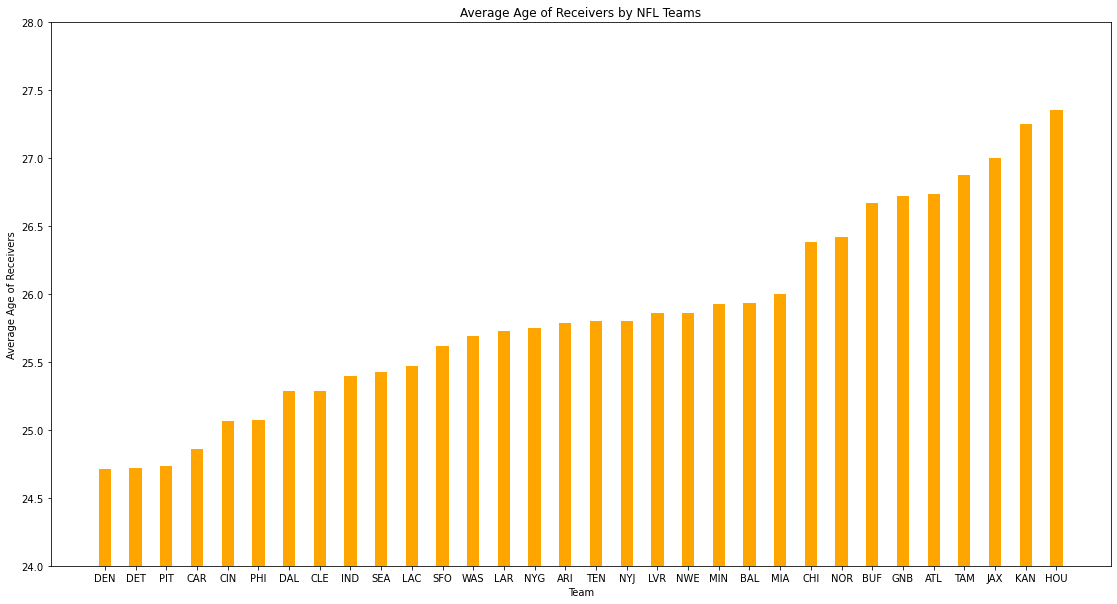

In [99]:
# now we construct our bar charts, the first will be average age by team
fig = plt.figure(figsize = (19, 10))
plt.bar(list(avgAge.keys()), list(avgAge.values()), color ='orange', width = 0.4) # orange since Denver is the youngest!
plt.xlabel("Team")
plt.ylabel("Average Age of Receivers")
plt.title("Average Age of Receivers by NFL Teams")
plt.ylim(24, 28)
plt.show()

As we can see, Denver, Detroit, and Pittsburgh are all very close to each other, and are among the youngest receiving corps in the NFL. This bodes well for their long term future as they attempt to contend for the playoffs and the Super Bowl. On the other hand, Jacksonville, Kansas City, and Houston have some of the oldest receiving corps in the NFL. With Jacksonville and Houston being rebuilding teams, this does not reflect well for their futures.

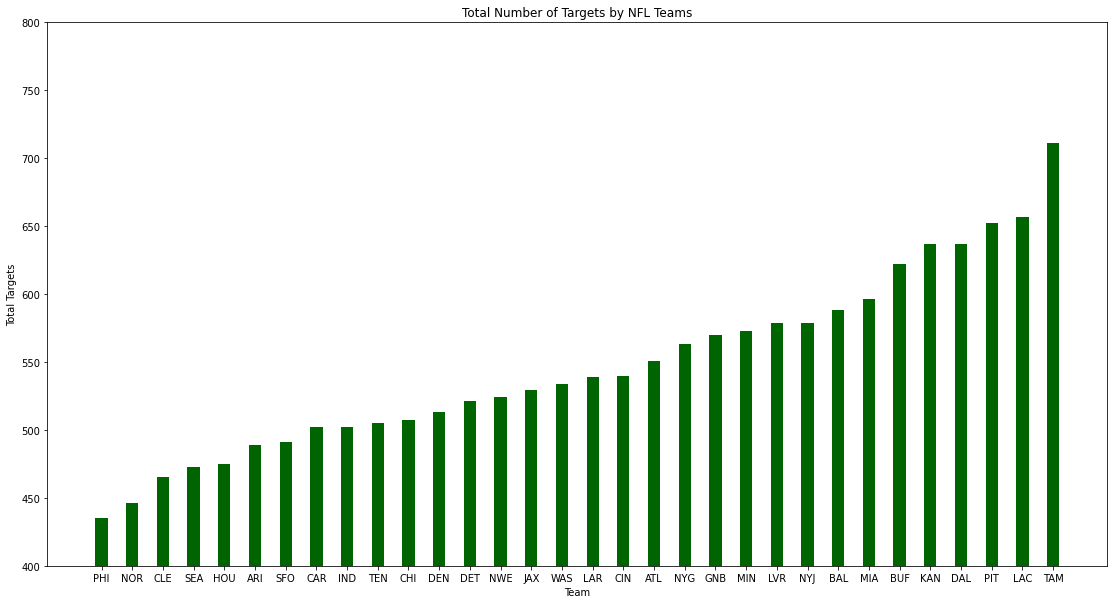

In [100]:
# bar chart for total targets
fig = plt.figure(figsize = (19, 10))
plt.bar(list(totalTargets.keys()), list(totalTargets.values()), color ='darkgreen', width = 0.4) # for philly
plt.xlabel("Team")
plt.ylabel("Total Targets")
plt.title("Total Number of Targets by NFL Teams")
plt.ylim(400,800)
plt.show()

Philly had the fewest total targets for their receivers, which makes sense, as they had a very run-oriented offense in 2021 led by Jalen Hurts. On the other hand, it also makes sense that Tampa Bay leads in total targets for their receivers, as they have numerous talented receivers for Tom Brady to throw the ball to.

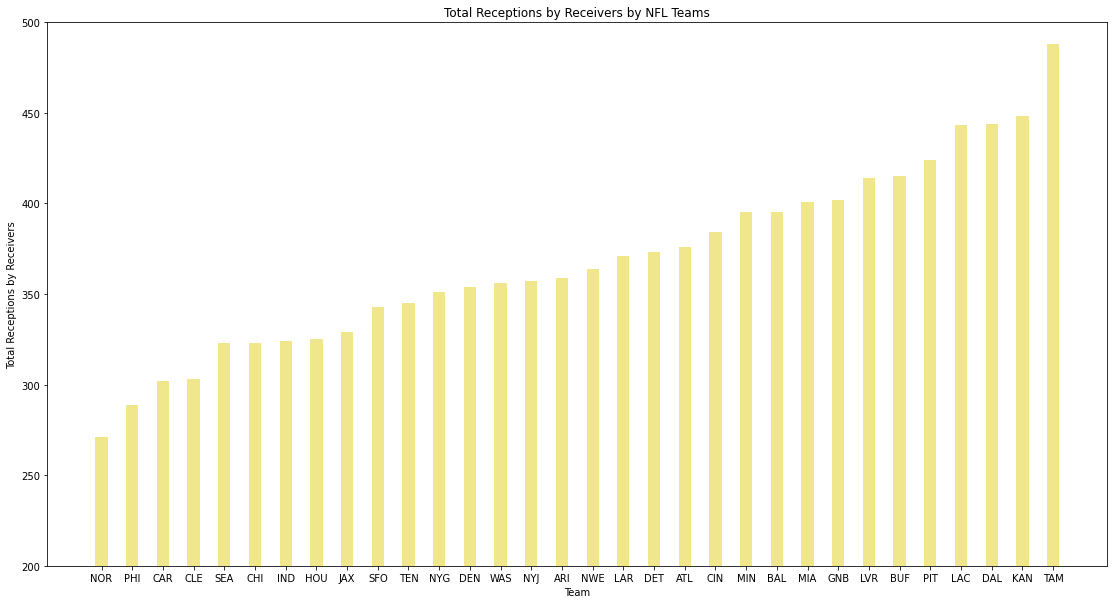

In [101]:
# total receptions
fig = plt.figure(figsize = (19, 10))
plt.bar(list(totalRec.keys()), list(totalRec.values()), color ='khaki', width = 0.4) # for New Orleans
plt.xlabel("Team")
plt.ylabel("Total Receptions by Receivers")
plt.title("Total Receptions by Receivers by NFL Teams")
plt.ylim(200, 500)
plt.show()

Unsurprisingly, this graph looks fairly similar to that of the total targets. Interestingly, however, is that while ahead of Philadelphia in total targets, New Orlean's receivers have fewer total receptions. This may suggest that either New Orleans's receivers are worse at catching the ball, or that their quarterback was less accurate.

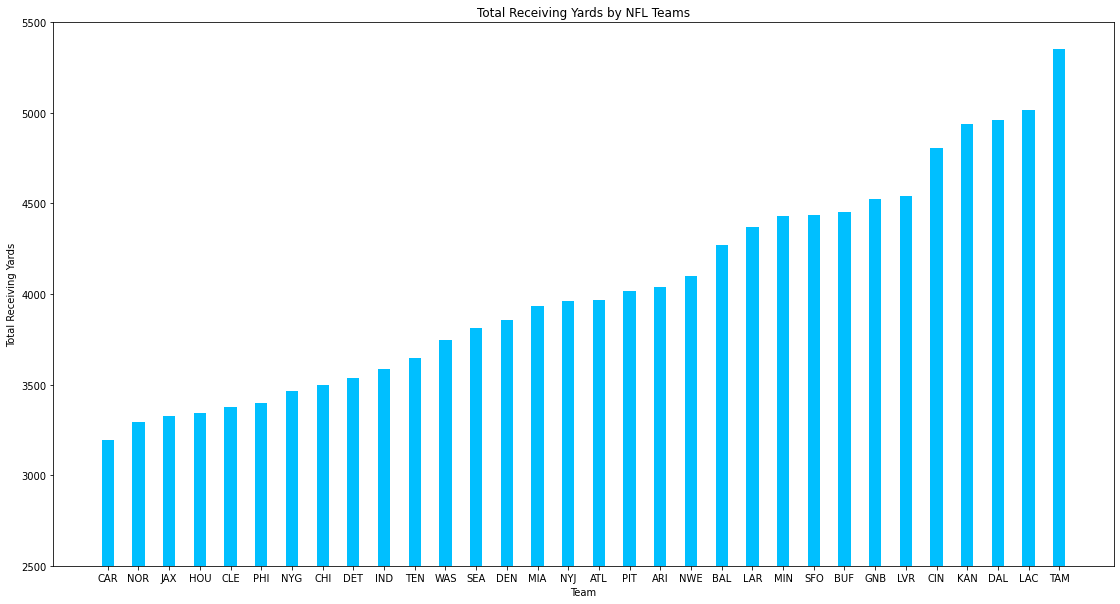

In [102]:
# total receiving yards
fig = plt.figure(figsize = (19, 10))
plt.bar(list(totalYards.keys()), list(totalYards.values()), color ='deepskyblue', width = 0.4) # for Carolina
plt.xlabel("Team")
plt.ylabel("Total Receiving Yards")
plt.title("Total Receiving Yards by NFL Teams")
plt.ylim(2500, 5500)
plt.show()

Interestingly, Carolina ranked at the bottom of the league for total receiving yards. This was likely due to the instability at quarterback that they suffered during the 2021 season, lacking a consistent starter. On the other side, we see Tampa Bay once again lead in receiving yards. This can likely be attributed to their quarterback situation being diametrically opposed to that of Carolina; they have Tom Brady, considered to be the greatest of all time, at the helm.

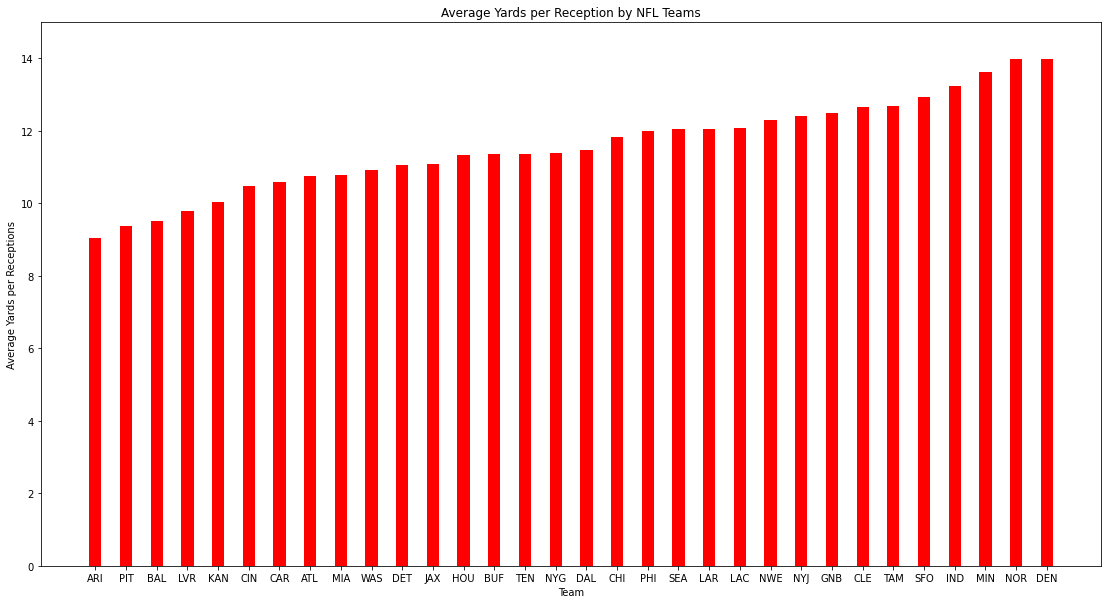

In [106]:
# average yards/reception
fig = plt.figure(figsize = (19, 10))
plt.bar(list(avgYpR.keys()), list(avgYpR.values()), color ='red', width = 0.4) # for Arizona
plt.xlabel("Team")
plt.ylabel("Average Yards per Receptions")
plt.title("Average Yards per Reception by NFL Teams")
plt.ylim(0, 15)
plt.show()

Interestingly, Arizona is the lowest on average yards per reception, despite being considered to have a "high flying offense". Also surprising is that Denver is on top, despite inconsistencies at quarterback.

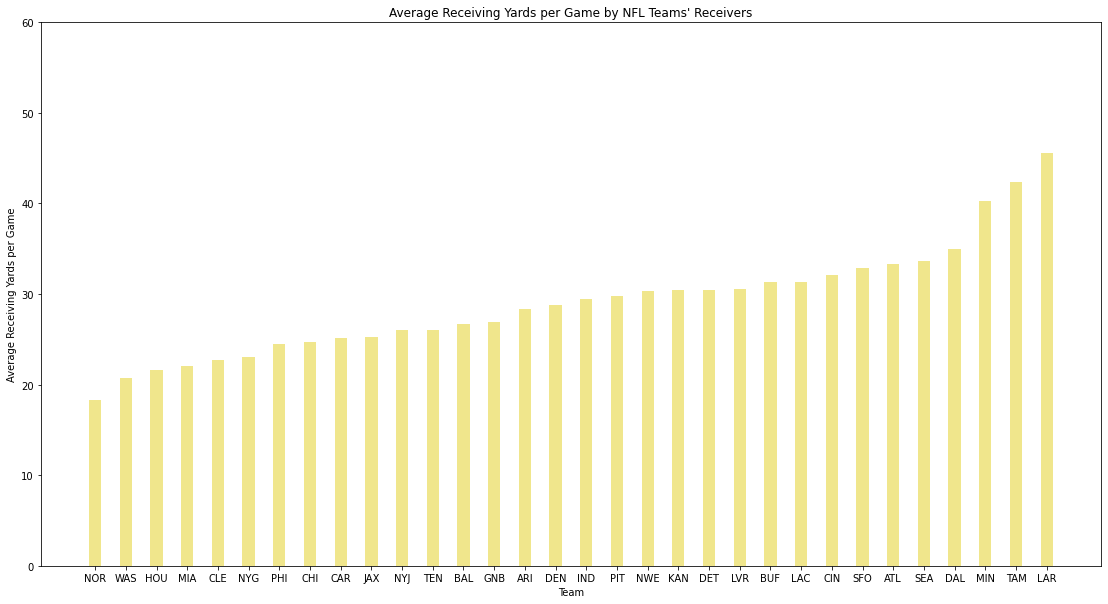

In [105]:
# average yards/game
fig = plt.figure(figsize = (19, 10))
plt.bar(list(avgYpG.keys()), list(avgYpG.values()), color ='khaki', width = 0.4) # for New Orleans
plt.xlabel("Team")
plt.ylabel("Average Receiving Yards per Game")
plt.title("Average Receiving Yards per Game by NFL Teams' Receivers")
plt.ylim(0, 60)
plt.show()

Once again, we see New Orleans be the worst in a receiving category. The Rams, with a top receiving corps, is the highest.

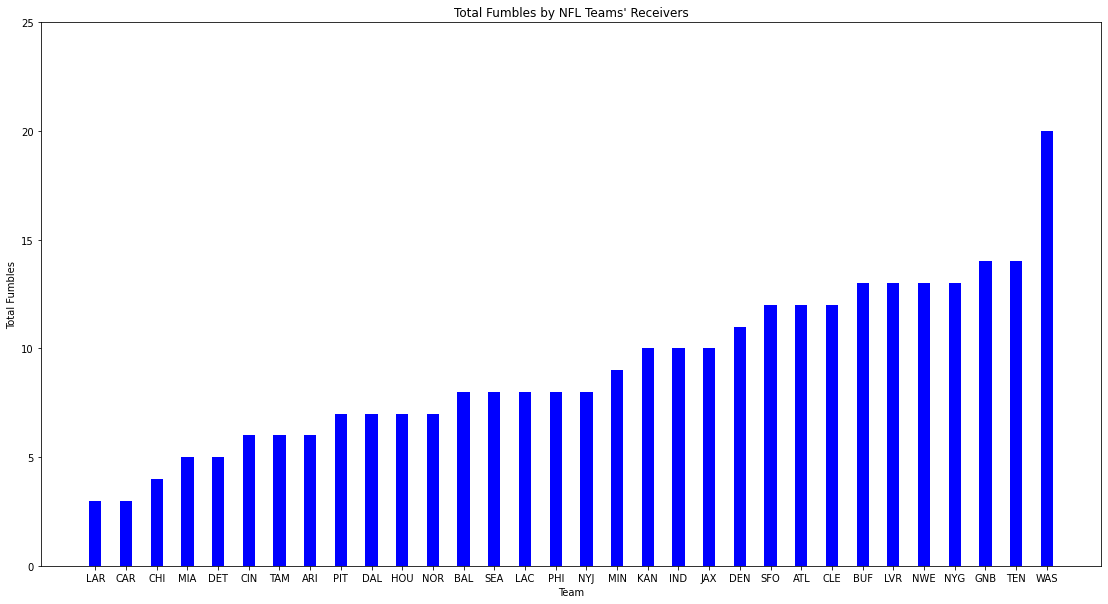

In [10]:
# total fumbles
fig = plt.figure(figsize = (19, 10))
plt.bar(list(totalFmb.keys()), list(totalFmb.values()), color ='blue', width = 0.4) # for LA Rams
plt.xlabel("Team")
plt.ylabel("Total Fumbles")
plt.title("Total Fumbles by NFL Teams' Receivers")
plt.ylim(0, 25)
plt.show()

We see the LA Rams and Carolina tied for the fewest total fumbles by receivers. Unfortunately, my favorite team, Washington has far and away the most total fumbles by receivers. This unfortunately corroborates what I observed on television.

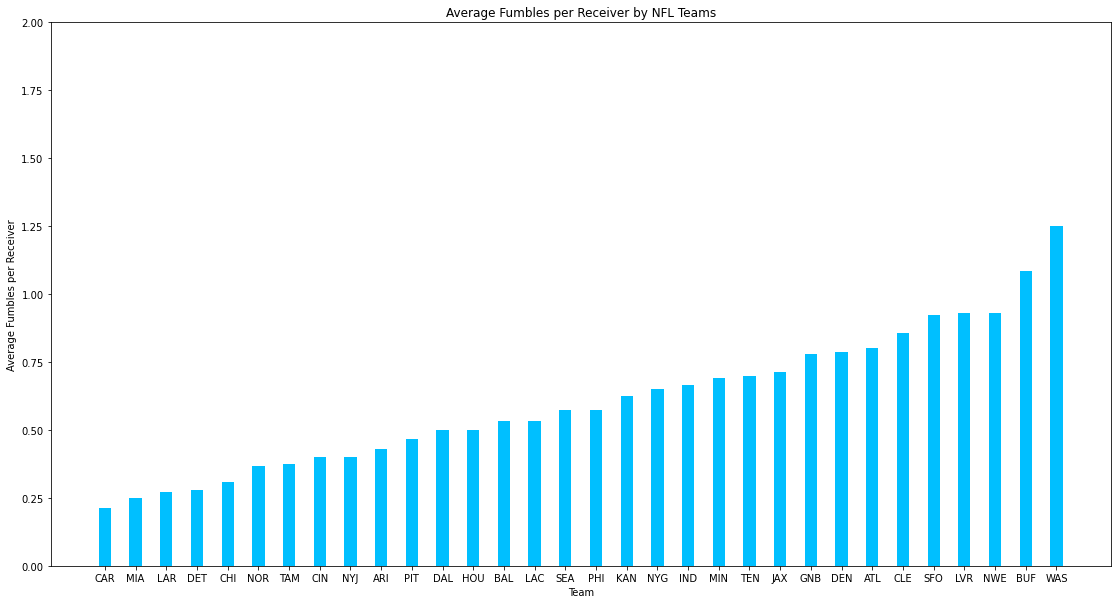

In [11]:
# average fumbles/receiver
fig = plt.figure(figsize = (19, 10))
plt.bar(list(avgFmb.keys()), list(avgFmb.values()), color ='deepskyblue', width = 0.4) # for Carolina
plt.xlabel("Team")
plt.ylabel("Average Fumbles per Receiver")
plt.title("Average Fumbles per Receiver by NFL Teams")
plt.ylim(0, 2)
plt.show()

Carolina has the lowest average number of fumbles per receiver. Unfortunately, Washington once again has the most by a good amount. Our players just need to hold onto the ball better!

**Quarterback Performance by Team**

Next, let's chart each team's quarterback performances by looking at passing statistics. To better understand the stats of the receivers, let's examine who was throwing them the ball. We will be looking at QB performance in the context of games started, since as opposed to receivers, who come in and out for different plays, quarterbacks who start a game will typically play the whole game. Additionally, there tends to be a large dropoff in play from a starting QB to his backups. We will calculate average quarterback play in relevant statistical categories as a function of (games started) * (stat). There are limitations to this model, as sometimes a QB can start a game, but get injured during it, and have his backup play significant time, but these occurrences are an exception, and not the norm.

In [107]:
# we will be storing relevant statistics per team in a dictionary
numPlayers = dict.fromkeys(teams, 0)
totalAge = dict.fromkeys(teams, 0)
totalAtt = dict.fromkeys(teams, 0)
totalCmp = dict.fromkeys(teams, 0)
totalCmpPc = dict.fromkeys(teams, 0)
totalPYards = dict.fromkeys(teams, 0)
totalPYpA = dict.fromkeys(teams, 0)
totalPYpG = dict.fromkeys(teams, 0)
totalSack = dict.fromkeys(teams, 0)
totalQBR = dict.fromkeys(teams, 0)
avgAge = {}
avgSack = {}
avgAtt = {}
avgCmp = {}
avgCmpPc = {}
avgPYards = {}
avgPYpA = {}
avgPYpG = {}
avgQBR = {}

# building our dictionaries
for index, plyr in df_pass.iterrows():
  if plyr["Tm"] in teams:
    # looking at QB only b/c non-QBs heavily skew these stats inaccurately
    if plyr["Pos"] not in ['WR', 'wr', 'rb', 'RB', 'te', 'TE', 'p', 'k']:
      numPlayers[plyr["Tm"]] += 1
      totalAge[plyr["Tm"]] += plyr["Age"]
      totalAtt[plyr["Tm"]] += plyr["Att"] * plyr["GS"]
      totalCmp[plyr["Tm"]] += plyr["Cmp"] * plyr["GS"]
      totalCmpPc[plyr["Tm"]] += plyr["Cmp%"] * plyr["GS"]
      totalPYpA[plyr["Tm"]] += plyr["Y/A"] * plyr["GS"]
      totalPYpG[plyr["Tm"]] += plyr["Y/G"] * plyr["GS"]
    totalSack[plyr["Tm"]] += plyr["Sk"]
    totalPYards[plyr["Tm"]] += plyr["Yds"] * plyr["GS"]
    # removing nan entries and non-QBs skewing average heavily
    if pd.isnull(plyr["QBR"]) == False and plyr["Pos"] not in ['WR', 'wr', 'rb', 'RB', 'te', 'TE', 'p', 'k']:
      totalQBR[plyr["Tm"]] += plyr["QBR"] * plyr["GS"]

# because stats are multiplied by games started, we divide by 17
# 17 total games in a NFL season
for tm in teams:
  avgAge[tm] = totalAge[tm] / numPlayers[tm]
  avgSack[tm] = totalSack[tm] / 17
  avgAtt[tm] = totalAtt[tm] / 17
  avgCmp[tm] = totalCmp[tm] / 17
  avgCmpPc[tm] = totalCmpPc[tm] / 17
  avgPYards[tm] = totalPYards[tm] / 17
  avgPYpA[tm] = totalPYpA[tm] / 17
  avgPYpG[tm] = totalPYpG[tm] / 17
  avgQBR[tm] = totalQBR[tm] / 17

# now we sort the stats by team in ascending order
avgAge = {k: v for k, v in sorted(avgAge.items(), key=lambda item: item[1])}
totalAtt = {k: v for k, v in sorted(totalAtt.items(), key=lambda item: item[1])}
totalCmp = {k: v for k, v in sorted(totalCmp.items(), key=lambda item: item[1])}
avgCmpPc = {k: v for k, v in sorted(avgCmpPc.items(), key=lambda item: item[1])}
totalPYards = {k: v for k, v in sorted(totalPYards.items(), key=lambda item: item[1])}
avgPYpA = {k: v for k, v in sorted(avgPYpA.items(), key=lambda item: item[1])}
avgPYpG = {k: v for k, v in sorted(avgPYpG.items(), key=lambda item: item[1])}
totalSack = {k: v for k, v in sorted(totalSack.items(), key=lambda item: item[1])}
avgSack = {k: v for k, v in sorted(avgSack.items(), key=lambda item: item[1])}
avgQBR = {k: v for k, v in sorted(avgQBR.items(), key=lambda item: item[1])}

# print the results for visual clarity
print("avgAge: ", avgAge)
print("totalAtt: ", totalAtt)
print("totalCmp: ", totalCmp)
print("avgCmpPc: ", avgCmpPc)
print("totalPYards: ", totalPYards)
print("avgPYpA: ", avgPYpA)
print("avgPYpG: ", avgPYpG)
print("totalSack: ", totalSack)
print("avgSack: ", avgSack)
print("avgQBR: ", avgQBR)
  

avgAge:  {'LAC': 23.0, 'BAL': 23.5, 'PHI': 24.666666666666668, 'JAX': 25.0, 'SFO': 25.5, 'BUF': 26.0, 'MIA': 26.0, 'DET': 26.333333333333332, 'DEN': 26.333333333333332, 'IND': 26.5, 'NYG': 26.6, 'CIN': 27.0, 'CAR': 27.333333333333332, 'NOR': 27.75, 'MIN': 28.0, 'DAL': 28.0, 'ATL': 28.0, 'NYJ': 28.0, 'CLE': 28.333333333333332, 'LVR': 29.0, 'ARI': 29.0, 'CHI': 29.333333333333332, 'NWE': 29.5, 'LAR': 30.0, 'HOU': 30.333333333333332, 'GNB': 30.5, 'WAS': 30.5, 'KAN': 31.0, 'TEN': 31.0, 'SEA': 32.0, 'PIT': 32.5, 'TAM': 38.0}
totalAtt:  {'NOR': 3105, 'CHI': 4151, 'NYG': 4759, 'CAR': 5162, 'HOU': 5234, 'BAL': 5336, 'NYJ': 5417, 'MIA': 5781, 'SEA': 5885, 'CLE': 6026, 'DEN': 6297, 'PHI': 6600, 'SFO': 6757, 'ARI': 7031, 'DET': 7198, 'WAS': 7447, 'CIN': 8354, 'GNB': 8558, 'IND': 8772, 'NWE': 8857, 'MIN': 9012, 'TEN': 9027, 'ATL': 9520, 'DAL': 9583, 'PIT': 9738, 'LAR': 10217, 'JAX': 10234, 'LVR': 10642, 'BUF': 10982, 'KAN': 11186, 'LAC': 11424, 'TAM': 12223}
totalCmp:  {'NOR': 1811, 'CHI': 2508, 'N

Not all of these statistics will be used in our analysis, but they are all important statistics to evaluate quarterback performance and overall passing offense. 

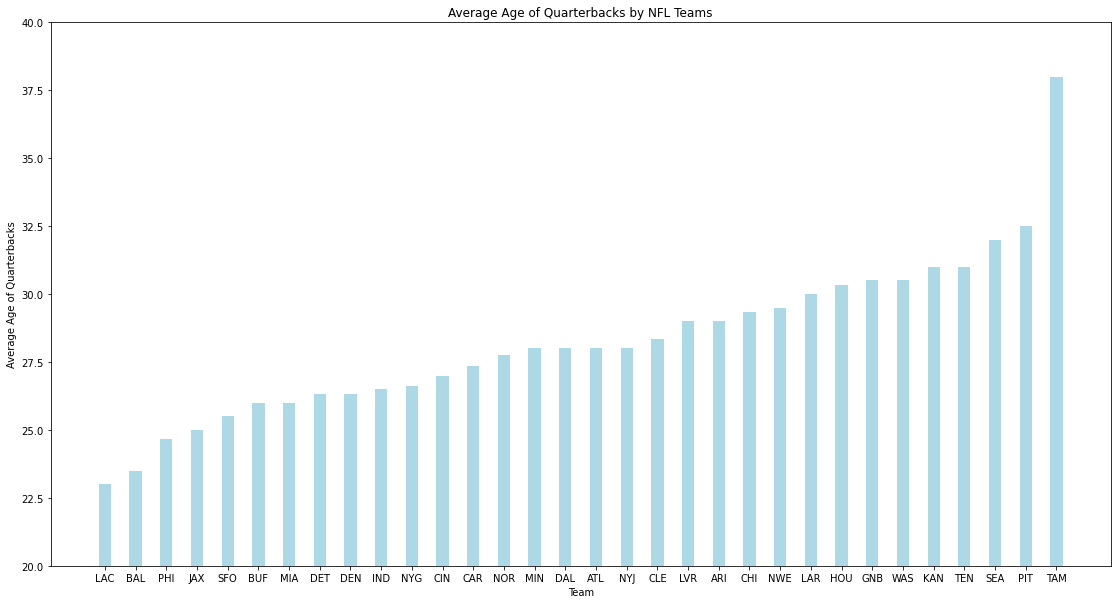

In [108]:
# average QB age by team
fig = plt.figure(figsize = (19, 10))
plt.bar(list(avgAge.keys()), list(avgAge.values()), color ='lightblue', width = 0.4) # for LA Chargers
plt.xlabel("Team")
plt.ylabel("Average Age of Quarterbacks")
plt.title("Average Age of Quarterbacks by NFL Teams")
plt.ylim(20, 40)
plt.show()

Nothing too surprising here. Interestingly, the LA Chargers are the youngest in terms of quarterbacks. This may be due to their emerging, second-year quarterback in Justin Herbert. Unsurprisingly, Tampa Bay is by far the oldest, due to the ageless wonder and anomaly, Tom Brady, who is playing at a MVP level well into his 40s at a position where most quarterbacks decline in their mid-30s.

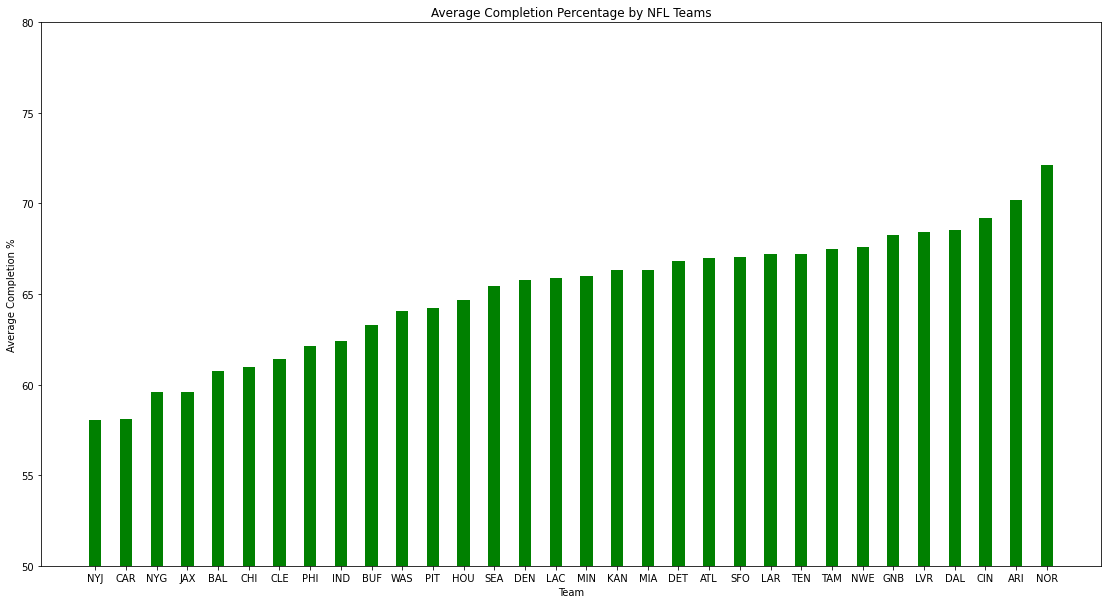

In [37]:
# average completion percentage by team
fig = plt.figure(figsize = (19, 10))
plt.bar(list(avgCmpPc.keys()), list(avgCmpPc.values()), color ='green', width = 0.4) # for NY Jets
plt.xlabel("Team")
plt.ylabel("Average Completion %")
plt.title("Average Completion Percentage by NFL Teams")
plt.ylim(50, 80)
plt.show()

Unsurprisingly, we see the New York Jets and Carolina at the bottom of the list in average completion percentage. The Jets had a struggling rookie at QB in Zach Wilson, while Carolina had inconsistent QB play throughout the season. Surprisingly, however, New Orleans leads in average completion percentage. Perhaps this is due to their run-heavy offense that protects their quarterbacks and gives them fewer opportunities to misfire.

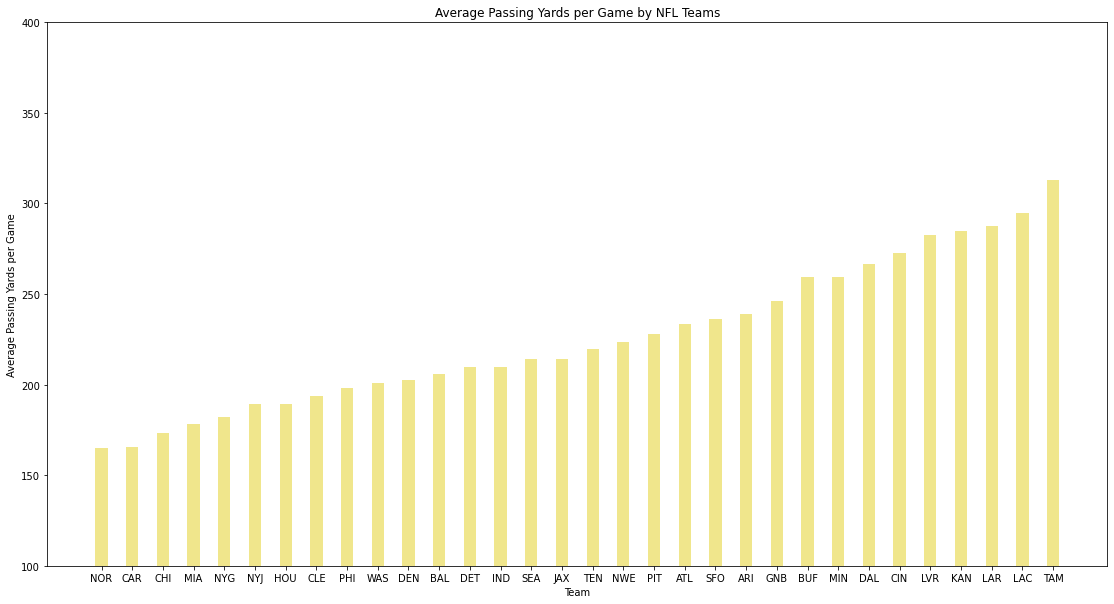

In [34]:
# average passing yards per game by team
fig = plt.figure(figsize = (19, 10))
plt.bar(list(avgPYpG.keys()), list(avgPYpG.values()), color ='khaki', width = 0.4) # for New Orleans
plt.xlabel("Team")
plt.ylabel("Average Passing Yards per Game")
plt.title("Average Passing Yards per Game by NFL Teams")
plt.ylim(100, 400)
plt.show()

Unsurprisingly, we once again see New Orleans at the bottom for passing yards per game. They leaned heavily on their run game and gadget plays to produce offense, when they could produce offense. Tampa Bay's high flying offense unsurprisingly landed them back on the top of the list.

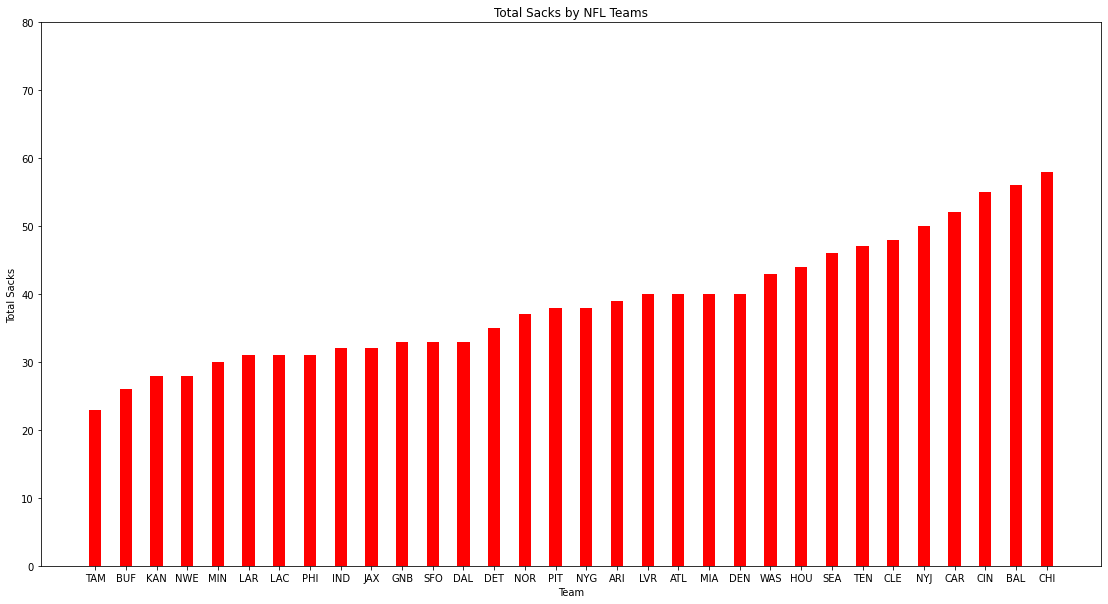

In [46]:
# total sacks by team
fig = plt.figure(figsize = (19, 10))
plt.bar(list(totalSack.keys()), list(totalSack.values()), color ='red', width = 0.4) # for Tampa Bay
plt.xlabel("Team")
plt.ylabel("Total Sacks")
plt.title("Total Sacks by NFL Teams")
plt.ylim(0, 80)
plt.show()

Tampa Bay got sacked the fewest times of any team. Their offensive line is considered among the best in the league, and Tom Brady knows how to get rid of the ball quickly before he can get sacked. Chicago, on the other hand, led all teams. Their rookie quarterback, Justin Fields, doesn't have the experience to know how to avoid sacks, and his offensive line was considered among the worst in the league.

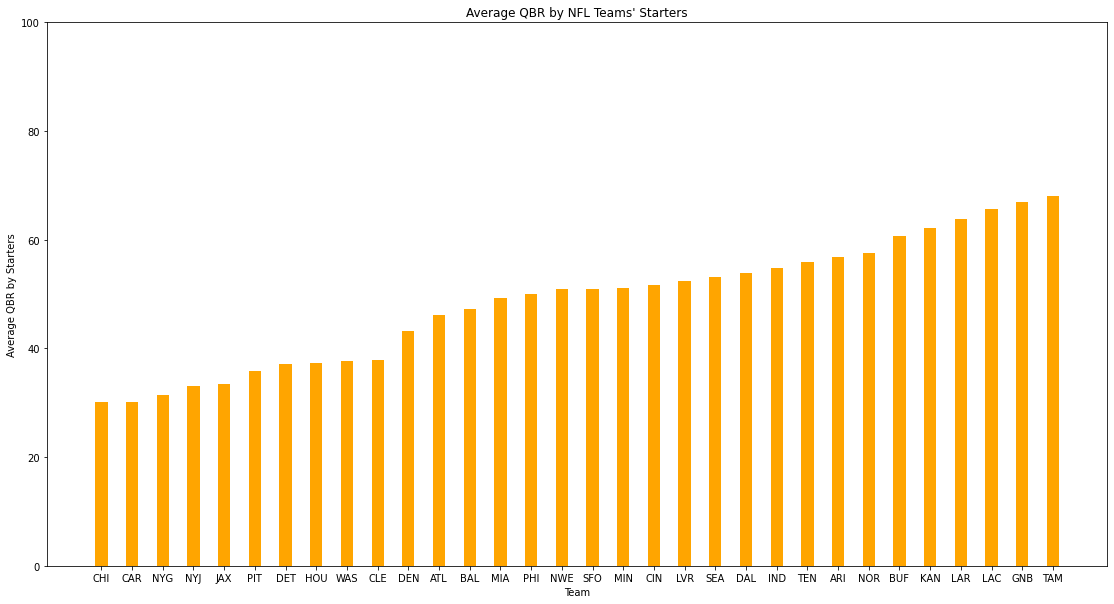

In [50]:
# average QBR by team
fig = plt.figure(figsize = (19, 10))
plt.bar(list(avgQBR.keys()), list(avgQBR.values()), color ='orange', width = 0.4) # for Chicago
plt.xlabel("Team")
plt.ylabel("Average QBR by Starters")
plt.title("Average QBR by NFL Teams' Starters")
plt.ylim(0, 100)
plt.show()

Now for the "juicy" part. While it is not a perfect stat, QBR gives us a great insight into the passing performance of a quarterback. This will be the meat and potatoes of our further analysis into receving performances in context. Chicago had the lowest average QBR by starting quarterback due to the poor performances by Justin Fields and Andy Dalton. Tampa Bay, of course, had the highest average QBR due to having 17 games of Tom Brady.

# Data Processing and Analysis

**Receiving Performances as a Function of Quarterback Rating**

Next, let's look at how receiving corps performed in response to their starting quarterbacks' performances, as measured by QBR.

**Least Squares Model**

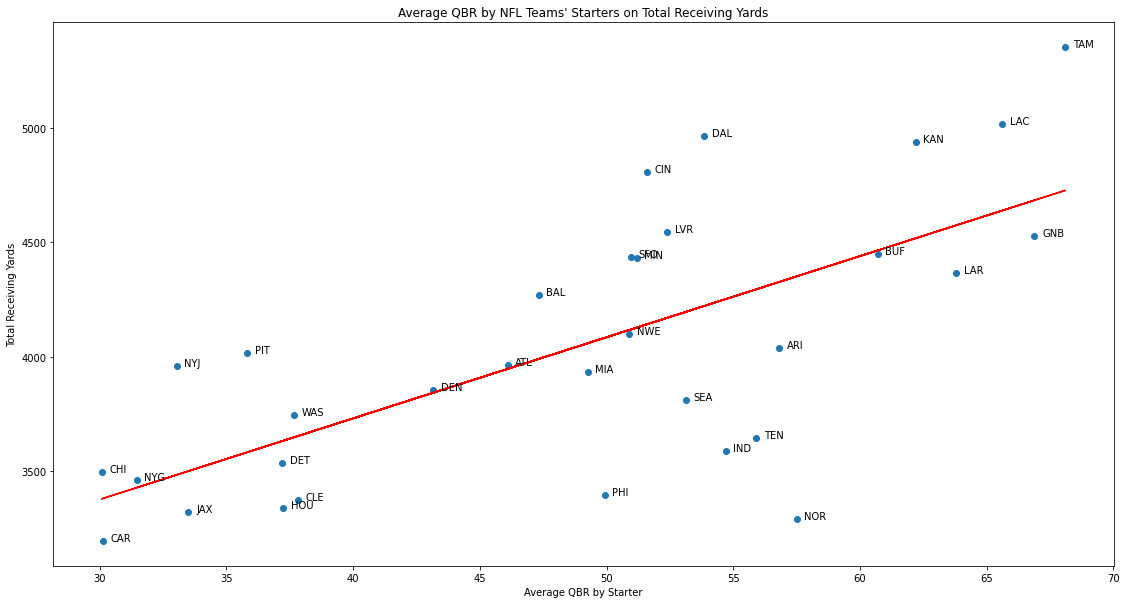

In [124]:
linear_regressor = LinearRegression()

# sort rec yards and QBR by team name for regression
totalYardsbyName = dict(sorted(totalYards.items()))
avgQBRbyName = dict(sorted(avgQBR.items()))
reg_x = np.array(list(avgQBRbyName.values())).reshape(-1,1)
reg_y = np.array(list(totalYardsbyName.values())).reshape(-1,1)
fit1 = linear_regressor.fit(reg_x, reg_y)
y_pred = linear_regressor.predict(reg_x)

# scatter plot plus regression line
plt.figure(figsize = (19, 10))
plt.scatter(reg_x, reg_y)
for i in range(len(reg_x)): # add team names
    plt.annotate(str(list(totalYardsbyName.keys())[i]), (reg_x[i] + 0.3, reg_y[i]))
plt.plot(reg_x, y_pred, color="red")
plt.xlabel("Average QBR by Starter")
plt.ylabel("Total Receiving Yards")
plt.title("Average QBR by NFL Teams' Starters on Total Receiving Yards")
plt.show()

We use a OLS (Ordinary Least Squares) model here because we have relatively few features to regress. Unsurprisingly, we can see here that as QBR increases, so does their teams' receiving yards. Based on our model, we can see which teams's receivers overperformed (i.e. Tampa Bay, Dallas) or underperformed (i.e. Philly, New Orleans) their team's level of quarterback play as measured by QBR.

Next, let's model and examine which receivers in particular outperformed their team's quarterback play by comparing residuals.

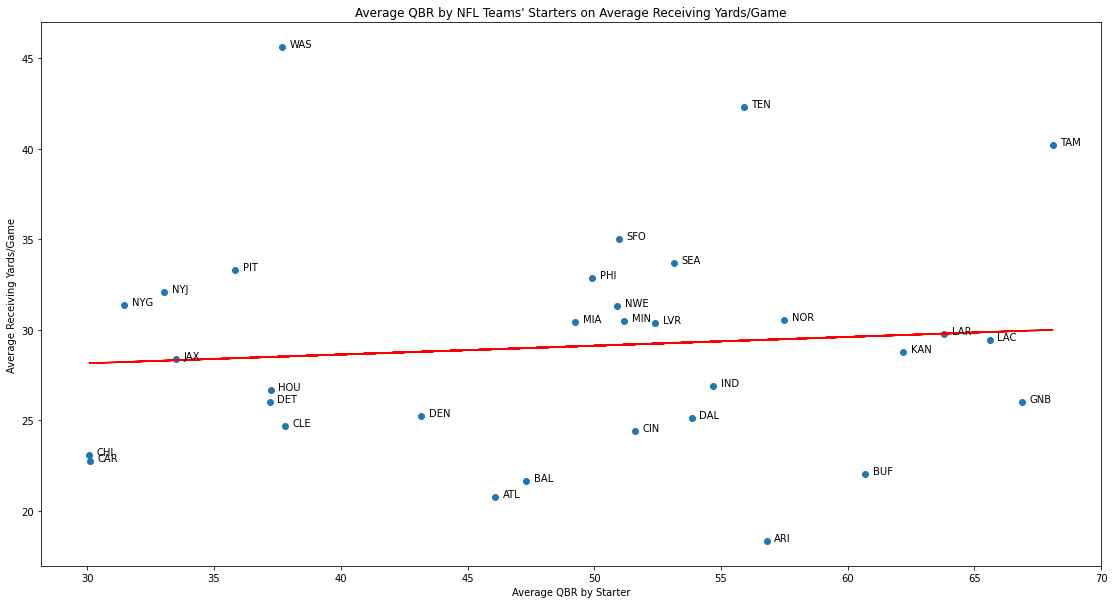

In [125]:
linear_regressor2 = LinearRegression()

# sort rec yards and QBR by team name for regression
avgYpGbyName = dict(sorted(avgYpG.items()))
reg_y2 = np.array(list(avgYpG.values())).reshape(-1,1)
fit2 = linear_regressor2.fit(reg_x, reg_y2)
y2_pred = linear_regressor2.predict(reg_x)

# scatter plot plus regression line
plt.figure(figsize = (19, 10))
plt.scatter(reg_x, reg_y2)
for i in range(len(reg_x)): # add team names
    plt.annotate(str(list(totalYardsbyName.keys())[i]), (reg_x[i] + 0.3, reg_y2[i]))
plt.plot(reg_x, y2_pred, color="red")
plt.xlabel("Average QBR by Starter")
plt.ylabel("Average Receiving Yards/Game")
plt.title("Average QBR by NFL Teams' Starters on Average Receiving Yards/Game")
plt.show()

In [115]:
ydsAboveExp = {}

# calculating residuals
for index, plyr in df_rec.iterrows():
  if plyr["Tm"] in teams:
    # we are interested in WRs and TEs only for this segment
    if plyr["Pos"] in ['WR', 'wr', 'TE', 'te', 'Te', 'Wr'] and pd.isnull(plyr["Pos"]) == False:
      lstQBR = [avgQBR[plyr["Tm"]]]
      tmQBR = np.array(lstQBR).reshape(-1,1)
      ydsAboveExp[plyr["Player"]] = plyr["Y/G"] - linear_regressor2.predict(tmQBR)[0][0]

# sorting our dictionary
ydsAboveExp = {k: v for k, v in sorted(ydsAboveExp.items(), key=lambda item: item[1])}

listYAE = list(ydsAboveExp.items())
rvlistYAE = [i for i in listYAE]
rvlistYAE.reverse()
print("Top 10 Receivers in Yards/Game above Expected: \n")

for i in range(10):
  print("Name: ", rvlistYAE[i][0], ",\n\tYards/Game Above Expected: ", rvlistYAE[i][1])

print("\nBottom 10 Receivers in Yards/Game above Expected: \n ")

for i in range(10):
  print("Name: ", listYAE[i][0], ",\n\tYards/Game Above Expected: ", listYAE[i][1])

Top 10 Receivers in Yards/Game above Expected: 

Name:  Cooper Kupp*+\KuppCo00 ,
	Yards/Game Above Expected:  84.71020284996231
Name:  Davante Adams*+\AdamDa01 ,
	Yards/Game Above Expected:  67.16059156787173
Name:  Justin Jefferson*\JeffJu00 ,
	Yards/Game Above Expected:  65.92206731087856
Name:  Deebo Samuel*+\SamuDe00 ,
	Yards/Game Above Expected:  58.633488019435106
Name:  Ja'Marr Chase*\ChasJa00 ,
	Yards/Game Above Expected:  56.40236658861855
Name:  Mark Andrews*+\AndrMa00 ,
	Yards/Game Above Expected:  51.11022348434744
Name:  Chris Godwin\GodwCh00 ,
	Yards/Game Above Expected:  48.80148940109167
Name:  Tee Higgins\HiggTe00 ,
	Yards/Game Above Expected:  48.70236658861856
Name:  Diontae Johnson*\JohnDi01 ,
	Yards/Game Above Expected:  44.167839579620164
Name:  Tyler Lockett\LockTy00 ,
	Yards/Game Above Expected:  44.1281319830011

Bottom 10 Receivers in Yards/Game above Expected: 
 
Name:  Darrell Daniels\DaniDa02 ,
	Yards/Game Above Expected:  -29.45031658819474
Name:  Daniel H

Based on our model, we have identified the 10 receivers/tight ends who overperformed and underperformed expectations based on their quarterbacks. Unsurprisingly, the top 10 are mostly current and former Pro-Bowl/All-Pro Selections (individual accolades given by NFL Players/Coaches and journalists respectively). See here for 2022 (for 2021 season) [Pro Bowl](https://www.nfl.com/pro-bowl/roster/) and [All-Pro Teams](https://www.nfl.com/news/2021-all-pro-team-jonathan-taylor-t-j-watt-cooper-kupp-highlight-roster). There are a couple surprising names like Tee Higgins and Tyler Lockett, however, who are not highly accomplished in terms of awards and/or not highly paid. Perhaps this model suggests that they are underrated. On the other hand, it's not surprising to see that the "underperformers" are mostly backups.

Further overperformers and underperformers based on the model will be listed below for further reference:

In [116]:
print("Top 50 Receivers in Yards/Game above Expected: \n")

for i in range(50):
  print("Name: ", rvlistYAE[i][0], ",\n\tYards/Game Above Expected: ", rvlistYAE[i][1])

print("\nBottom 50 Receivers in Yards/Game above Expected: \n ")

for i in range(50):
  print("Name: ", listYAE[i][0], ",\n\tYards/Game Above Expected: ", listYAE[i][1])

Top 50 Receivers in Yards/Game above Expected: 

Name:  Cooper Kupp*+\KuppCo00 ,
	Yards/Game Above Expected:  84.71020284996231
Name:  Davante Adams*+\AdamDa01 ,
	Yards/Game Above Expected:  67.16059156787173
Name:  Justin Jefferson*\JeffJu00 ,
	Yards/Game Above Expected:  65.92206731087856
Name:  Deebo Samuel*+\SamuDe00 ,
	Yards/Game Above Expected:  58.633488019435106
Name:  Ja'Marr Chase*\ChasJa00 ,
	Yards/Game Above Expected:  56.40236658861855
Name:  Mark Andrews*+\AndrMa00 ,
	Yards/Game Above Expected:  51.11022348434744
Name:  Chris Godwin\GodwCh00 ,
	Yards/Game Above Expected:  48.80148940109167
Name:  Tee Higgins\HiggTe00 ,
	Yards/Game Above Expected:  48.70236658861856
Name:  Diontae Johnson*\JohnDi01 ,
	Yards/Game Above Expected:  44.167839579620164
Name:  Tyler Lockett\LockTy00 ,
	Yards/Game Above Expected:  44.1281319830011
Name:  Tyreek Hill*\HillTy00 ,
	Yards/Game Above Expected:  43.18786366814675
Name:  Stefon Diggs*\DiggSt00 ,
	Yards/Game Above Expected:  42.460670685

# Evaluating our Models

To evaluate the significance of our models, we will be performing a [F-test](https://en.wikipedia.org/wiki/F-test) with α ([level of significance](https://statisticsbyjim.com/glossary/significance-level/#:~:text=The%20significance%20level%2C%20also%20known,level%20before%20conducting%20the%20experiment.)) = 0.05. Additionally, we will look at our coefficient of determination (r^2) to determine the goodness of fit of our regression lines.

In [129]:
# r^2
r2_model1 = fit1.score(reg_x, reg_y)
r2_model2 = fit2.score(reg_x, reg_y2)

print("Coefficient of Determination (r^2) for Model 1:", r2_model1)
print("Coefficient of Determination (r^2) for Model 2:", r2_model2)

Coefficient of Determination (r^2) for Model 1: 0.4768723115651343
Coefficient of Determination (r^2) for Model 2: 0.008236479705757027


As r^2 is below 0.5 for both models, the regression line does not fit the data all too well. This may be due to limitations in our data set being small.

In [136]:
# F test
from sklearn.feature_selection import f_regression

f1 = f_regression(reg_x, reg_y.ravel())
f2 = f_regression(reg_x, reg_y2.ravel())
print("Model 1 F:", f1[0][0], "Model 1 p-value: ", f1[1][0])
print("Model 2 F:", f2[0][0], "Model 2 p-value: ", f2[1][0])


Model 1 F: 27.34737553226512 Model 1 p-value:  1.2185020017884797e-05
Model 2 F: 0.24914648110813012 Model 2 p-value:  0.6213174845108813


Our first model is statistically significant as p < 0.05, so we reject the null. We have sufficient evidence to conclude it is statistically significant. Our second model, p > 0.05, so we fail to reject the null. This may once again be due to the limitations of our data set size being small.

# Conclusion

A lot goes on in a NFL season, and with loads of players, it's hard to keep track of whose performance is or is not up to snuff. I hope that through this analysis, you learned about the NFL and its players, and who performed well and who didn't!